In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame

In [27]:
df = read_csv('stan_results/2pl_fg_m4_summary.tsv', sep='\t', index_col=0)

beta = df.T.filter(regex='beta').T['Mean'].values.reshape(64,6)
alpha = df.T.filter(regex='alpha').T['Mean'].values.reshape(64,6)

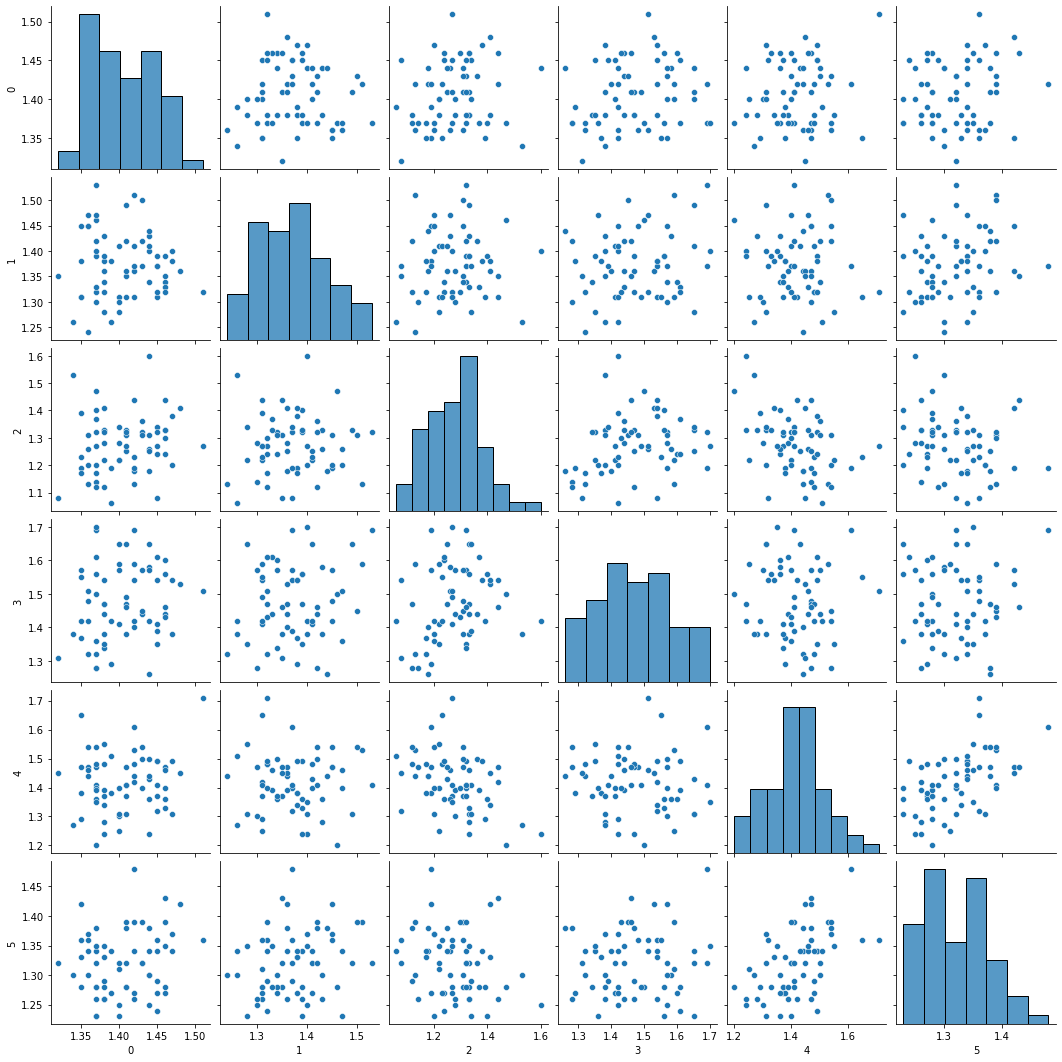

In [32]:
sns.pairplot(DataFrame(alpha))

<AxesSubplot:>

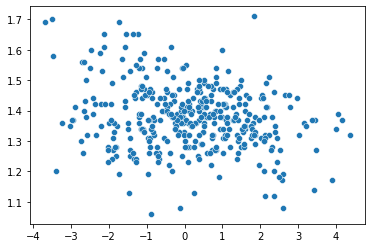

In [14]:
sns.scatterplot(x=beta, y=alpha)

<AxesSubplot:xlabel='0', ylabel='0'>

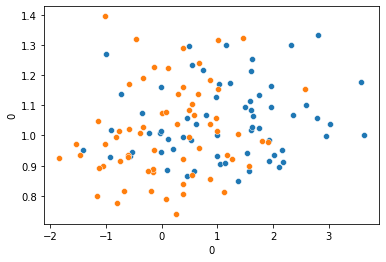

In [14]:
sns.scatterplot(x=b[0], y=a[0])
sns.scatterplot(x=b[1], y=a[1])

<AxesSubplot:>

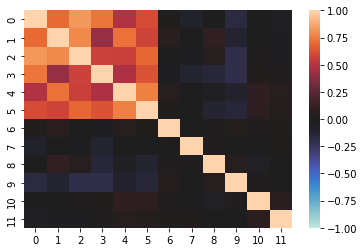

In [6]:
sns.heatmap(df.T.filter(regex='Corr').T['Mean'].values.reshape(12,12), vmin=-1, vmax=1, center=0)